In [107]:
import torch 
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
df = pd.read_csv('NYCTaxiFares.csv')

In [109]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [110]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [111]:
# calculate the distance travelled
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [112]:
df['dist_km'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [113]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [114]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [116]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [117]:
my_time = df['pickup_datetime'][0]

In [118]:
my_time.hour

8

In [119]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [120]:
df['Hour'] = df['EDTdate'].dt.hour

In [121]:
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')

In [122]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [123]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [124]:
# separate categorical from continious
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']

In [125]:
y_col = ['fare_amount']

In [126]:
# Convert our three categorical columns to category dtypes.
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [127]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [128]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [129]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [130]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [131]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [132]:
df['Weekday'].head().cat.codes

0    1
1    2
2    2
3    3
4    0
dtype: int8

In [133]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values


In [134]:
hr


array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [135]:
cats = np.stack([hr, ampm, wkdy], 1)

In [136]:
cats[:5]

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3],
       [22,  1,  0]], dtype=int8)

In [137]:
# we can do this by following these 3 steps
# cat_cols = ['Hour', 'AMorPM', 'Weekday']
# for cat in cat_cols:
#    df[cat] = df[cat].astype('category')
# cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [138]:
# now transform our array into a tensor
cats = torch.tensor(cats,dtype=torch.int64)

In [139]:
conts = np.stack([df[col].values for col in cont_cols], 1)

In [140]:
conts[:5]

array([[ 40.730521  , -73.992365  ,  40.744746  , -73.975499  ,
          1.        ,   2.12631159],
       [ 40.740558  , -73.990078  ,  40.744114  , -73.974232  ,
          1.        ,   1.39230687],
       [ 40.751118  , -73.994149  ,  40.766235  , -73.960064  ,
          2.        ,   3.32676344],
       [ 40.756422  , -73.990485  ,  40.748192  , -73.971205  ,
          1.        ,   1.86412925],
       [ 40.734202  , -73.990976  ,  40.743115  , -73.905956  ,
          1.        ,   7.23132104]])

In [141]:
conts = torch.tensor(conts,dtype=torch.float)

In [142]:
conts

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        ...,
        [ 40.7498, -73.9886,  40.7078, -74.0115,   3.0000,   5.0525],
        [ 40.7245, -74.0044,  40.7308, -73.9927,   1.0000,   1.2089],
        [ 40.7719, -73.9554,  40.7630, -73.9676,   3.0000,   1.4274]])

In [143]:
labels = df[y_col].values

In [144]:
labels

array([[ 6.5],
       [ 6.9],
       [10.1],
       ...,
       [12.5],
       [ 4.9],
       [ 5.3]])

In [145]:
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)

In [146]:
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [147]:
cats.shape

torch.Size([120000, 3])

In [148]:
conts.shape

torch.Size([120000, 6])

In [149]:
y.shape

torch.Size([120000, 1])

In [150]:
# This will set embedding sizes for Hours, AMvsPM and Weekdays
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [151]:
# Define a TabularModel
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [152]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200,100], p=0.4)

In [153]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [154]:
criterion = nn.MSELoss()  # we'll convert this to RMSE later
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [155]:
# 120000 is pretty big so for training we will just take the half
batch_size = 60000
test_size = int(batch_size * .2)

In [156]:
# DATA SHUFFLED ALREADY
# if it is not the case for your data go ahead and shuffle
# before doing any sort of separation
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [157]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [158]:
len(cat_train)

48000

In [159]:
len(con_train)

48000

In [160]:
len(cat_test)

12000

In [161]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i}  loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

duration = time.time() - start_time
print(f'Trainig took {duration/60} minutes')

epoch: 1  loss: 12.569019317626953
epoch: 11  loss: 11.707297325134277
epoch: 21  loss: 11.126460075378418
epoch: 31  loss: 10.723576545715332
epoch: 41  loss: 10.453323364257812
epoch: 51  loss: 10.229157447814941
epoch: 61  loss: 10.026406288146973
epoch: 71  loss: 9.84231185913086
epoch: 81  loss: 9.637185096740723
epoch: 91  loss: 9.428326606750488
epoch: 101  loss: 9.197139739990234
epoch: 111  loss: 8.908242225646973
epoch: 121  loss: 8.60488224029541
epoch: 131  loss: 8.245100975036621
epoch: 141  loss: 7.845258712768555
epoch: 151  loss: 7.404627799987793
epoch: 161  loss: 6.963348388671875
epoch: 171  loss: 6.499824047088623
epoch: 181  loss: 6.006209850311279
epoch: 191  loss: 5.509527683258057
epoch: 201  loss: 5.041131973266602
epoch: 211  loss: 4.651059627532959
epoch: 221  loss: 4.356410503387451
epoch: 231  loss: 4.103184700012207
epoch: 241  loss: 3.9283361434936523
epoch: 251  loss: 3.885756492614746
epoch: 261  loss: 3.7924115657806396
epoch: 271  loss: 3.791783332824

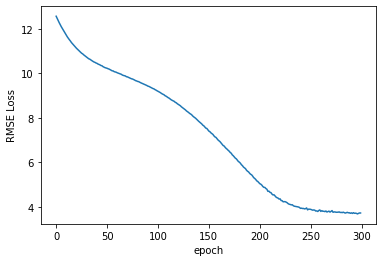

In [162]:
# plot the loss function
plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [163]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():

    y_val = model(cat_test, con_test)

    loss = torch.sqrt(criterion(y_val, y_test))

In [164]:
loss

tensor(3.6241)

In [165]:
df = pd.DataFrame({'Actual': y_test.numpy().tolist(), 'Predicted': y_val.numpy().tolist()})
df['Actual'].min()

[2.5]

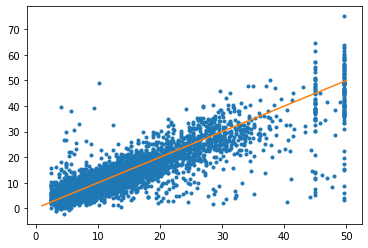

In [166]:
plt.plot(y_test, y_val, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(1, 50, len(y_test) )
y = x
plt.plot(x, y)
plt.show()

In [167]:
print(f'{"PREDICTED":>12} {"ACTUAL":>8} {"DIFF":>8}')
for i in range(50):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i+1:2}. {y_val[i].item():8.4f} {y_test[i].item():8.4f} {diff:8.4f}')

   PREDICTED   ACTUAL     DIFF
 1.   4.1745   2.9000   1.2745
 2.  14.3218   5.7000   8.6218
 3.   7.0884   7.7000   0.6116
 4.  14.6799  12.5000   2.1799
 5.   5.8542   4.1000   1.7542
 6.   5.5269   5.3000   0.2269
 7.   4.5811   3.7000   0.8811
 8.  20.0993  14.5000   5.5993
 9.   9.3548   5.7000   3.6548
10.  12.6707  10.1000   2.5707
11.   7.7874   4.5000   3.2874
12.   1.3431   6.1000   4.7569
13.   6.4537   6.9000   0.4463
14.  11.0019  14.1000   3.0981
15.   5.1186   4.5000   0.6186
16.  31.5361  34.1000   2.5639
17.   1.1131  12.5000  11.3869
18.   6.0005   4.1000   1.9005
19.   7.1449   8.5000   1.3551
20.   3.8667   5.3000   1.4333
21.  14.7816  11.3000   3.4816
22.   9.5428  10.5000   0.9572
23.  17.3262  15.3000   2.0262
24.  16.7489  14.9000   1.8489
25.  45.5443  49.5700   4.0257
26.   1.6840   5.3000   3.6160
27.   4.8186   3.7000   1.1186
28.   4.6826   6.5000   1.8174
29.  14.3196  14.1000   0.2196
30.   6.2880   4.9000   1.3880
31.   4.5404   3.7000   0.8404
32.  31.

In [168]:
 # save the model
 torch.save(model.state_dict(), 'TaxiFareRegrModel.pt')